In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
%precision 3

'%.3f'

In [3]:
x = np.linspace(0, 10, num = 11, endpoint = True)
x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [4]:
y = np.cos(-x**2/5)
y

array([ 1.   ,  0.98 ,  0.697, -0.227, -0.998,  0.284,  0.608, -0.93 ,
        0.973, -0.881,  0.408])

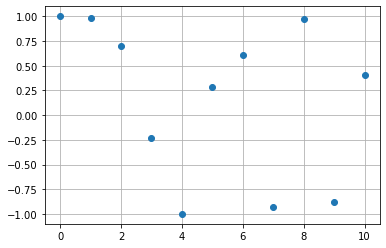

In [5]:
plt.plot(x,y,'o')
plt.grid(True)

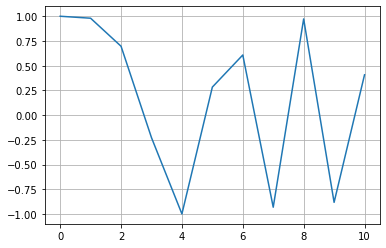

In [11]:
from scipy import interpolate
# 線形補完
f = interpolate.interp1d(x, y, 'linear')
plt.plot(x,f(x),'-')
plt.grid(True)

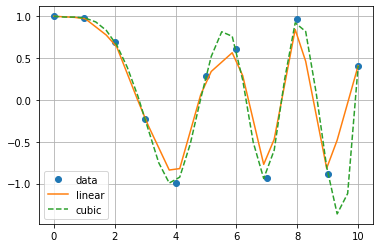

In [13]:
# スプライン3次補完
f2 = interpolate.interp1d(x,y,'cubic')

xnew = np.linspace(0,10,num=30, endpoint=True)

plt.plot(x,y,'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')

plt.legend(['data', 'linear', 'cubic'], loc = 'best')
plt.grid(True)

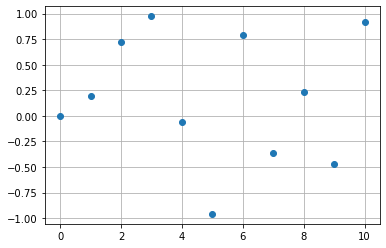

In [14]:
x = np.linspace(0, 10, num=11, endpoint = True)
y = np.sin(x**2/5)
plt.plot(x,y,'o')
plt.grid(True)

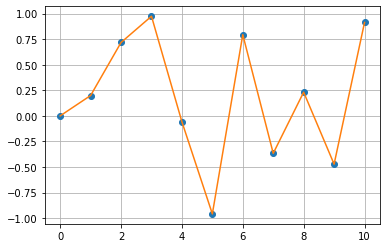

In [19]:
f = interpolate.interp1d(x, y, 'linear')
plt.plot(x,y,'o',x,f(x), '-')
plt.grid(True)

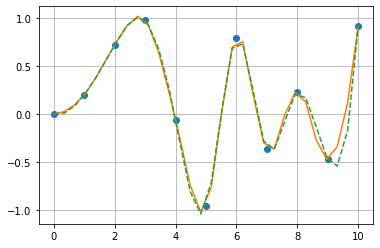

In [21]:
# スプライン2,3次補完
f2 = interpolate.interp1d(x,y,'quadratic')
f3 = interpolate.interp1d(x,y,'cubic')

xnew = np.linspace(0,10,num=30, endpoint=True)
plt.plot(x,y,'o', xnew, f2(xnew), '-', xnew, f3(xnew), '--')
plt.grid(True)

In [23]:
A = np.array([[1,2,3,4,5],[6,7,8,9,10]])
A

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [25]:
U, s , Vs = sp.linalg.svd(A)
print(U)
print(s)
print(Vs)

[[-0.37   0.929]
 [-0.929 -0.37 ]]
[19.538  1.81 ]
[[-0.304 -0.371 -0.437 -0.504 -0.57 ]
 [-0.712 -0.403 -0.094  0.215  0.524]
 [-0.374 -0.008  0.862 -0.206 -0.274]
 [-0.365  0.371 -0.159  0.665 -0.512]
 [-0.357  0.75  -0.179 -0.464  0.251]]


In [27]:
m,n = A.shape
print(m)
print(n)

2
5


In [28]:
S = sp.linalg.diagsvd(s,m,m)
print(S)

[[19.538  0.   ]
 [ 0.     1.81 ]]


In [29]:
A = np.identity(5)
A

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [31]:
A[0,:] = 1
A[:,0] = 1
A[0,0] = 5
A

array([[5., 1., 1., 1., 1.],
       [1., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.]])

In [32]:
b = np.ones(5)
(LU,piv) = sp.linalg.lu_factor(A)
L = np.identity(5) + np.tril(LU, -1)
U = np.triu(LU)
P = np.identity(5)[piv]
print(L)
print(U)
print(P)

[[ 1.     0.     0.     0.     0.   ]
 [ 0.2    1.     0.     0.     0.   ]
 [ 0.2   -0.25   1.     0.     0.   ]
 [ 0.2   -0.25  -0.333  1.     0.   ]
 [ 0.2   -0.25  -0.333 -0.5    1.   ]]
[[ 5.     1.     1.     1.     1.   ]
 [ 0.     0.8   -0.2   -0.2   -0.2  ]
 [ 0.     0.     0.75  -0.25  -0.25 ]
 [ 0.     0.     0.     0.667 -0.333]
 [ 0.     0.     0.     0.     0.5  ]]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [33]:
A = np.array([[7,-1,0,1],
             [-1,9,-2,2],
             [0,-2,8,-3],
             [1,2,-3,10]])
b = np.array([5,20,0,20])
L = sp.linalg.cholesky(A)

In [35]:
t = sp.linalg.solve(L.T.conj(),b)
x = sp.linalg.solve(L, t)
print(x)

[0.758 2.168 1.241 1.863]


In [36]:
np.dot(A,x)

array([5.000e+00, 2.000e+01, 3.553e-15, 2.000e+01])